In [1]:
%run -m ipy_startup
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
d = load_boston()
df = pd.DataFrame(d['data'], columns=d['feature_names'])
df['response'] = d['target']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM        506 non-null float64
ZN          506 non-null float64
INDUS       506 non-null float64
CHAS        506 non-null float64
NOX         506 non-null float64
RM          506 non-null float64
AGE         506 non-null float64
DIS         506 non-null float64
RAD         506 non-null float64
TAX         506 non-null float64
PTRATIO     506 non-null float64
B           506 non-null float64
LSTAT       506 non-null float64
response    506 non-null float64
dtypes: float64(14)
memory usage: 59.3 KB


In [3]:
df['response'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: response, dtype: float64

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
X, y = df.drop('response', axis=1), df['response']
clf = GradientBoostingRegressor()
clf.fit(X, y)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

(<matplotlib.figure.Figure at 0x10cd27a20>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x10c992320>])

/Users/eczech/anaconda/envs/research3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


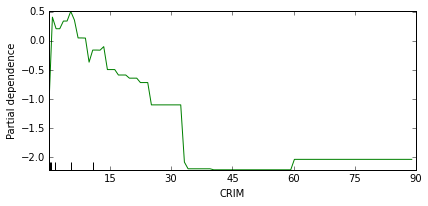

In [35]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
plot_partial_dependence(clf, X, features=['CRIM'], feature_names=X.columns.tolist(), percentiles=(0, 1))

In [41]:
import imp
imp.reload(partial_dependence)

<module 'ml.model.partial_dependence' from '/Users/eczech/repos/portfolio/functional/ml/python/ml/model/partial_dependence.py'>

In [38]:
from ml.model import partial_dependence

pred_fun = lambda clf, X: clf.predict(X)
pdp = partial_dependence.get_partial_dependence_1d(clf, X, 'CRIM', pred_fun)
        

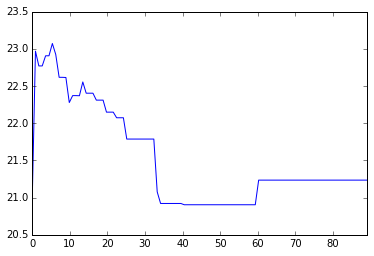

In [39]:
pdp['CRIM'].mean().plot()

In [43]:
partial_dependence.plot_partial_dependence(pdp, smooth_window=6)